In [1]:
import pandas as pd
import glob
path = r'./data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df

,node_id,timestamp,x,y,z,q
0,-2393099149039893833,2020-06-24 12:20:08.533016+00:00,2762,-257,100,0
1,-2393099149039893833,2020-06-24 12:20:08.620015+00:00,2870,-344,100,0
2,-2393099149039893833,2020-06-24 12:20:09.622827+00:00,2916,-344,100,0
3,-2393099149039893833,2020-06-24 12:20:09.622846+00:00,2894,-254,100,0
4,-2393099149039893833,2020-06-24 12:20:10.116102+00:00,2888,-188,100,0
...,...,...,...,...,...,...
13890901,4996252679627069957,2020-06-01 03:00:05.469336+00:00,635,1064,0,0
13890902,4996252679627069957,2020-06-01 03:00:06.47926+00:00,681,760,0,0
13890903,4996252679627069957,2020-06-01 03:00:08.507118+00:00,622,991,0,0
13890904,4996252679627069957,2020-06-01 03:00:09.547553+00:00,644,1066,0,0


Tarkistetaan onko outouksia

In [2]:
missing_count = df.isnull().sum()
print(missing_count)

node_id      0
timestamp    0
x            0
y            0
z            0
q            0
dtype: int64


In [3]:
print("uniques in x",len(df['x'].unique()))
print("uniques in y",len(df['y'].unique()))
print("uniques in z",len(df['z'].unique()))
print("uniques in q",len(df['q'].unique()))

uniques in x 10532
uniques in y 7899
uniques in z 3
uniques in q 1


In [4]:
print("uniques in z",df['z'].unique())
print("uniques in q",df['q'].unique())

uniques in z [100 400   0]
uniques in q [0]


- q eli signaalin laatu ei vaihtele yhtään.
- z eli z-akseli (ylös päin), muuttuu nollasta sataan ja neljäänsataan

### Otetaan käyttöön vain ensimmäinen node

In [68]:
print("Number of nodes: %s" % len(df["node_id"].unique()))

print("First node: %s" % df["node_id"].unique()[0])
node = df["node_id"].unique()[0]

df1 = df[df["node_id"] == node]
df1

Number of nodes: 32
First node: -2393099149039893833


,node_id,timestamp,x,y,z,q
0,-2393099149039893833,2020-06-24 12:20:08.533016+00:00,2762,-257,100,0
1,-2393099149039893833,2020-06-24 12:20:08.620015+00:00,2870,-344,100,0
2,-2393099149039893833,2020-06-24 12:20:09.622827+00:00,2916,-344,100,0
3,-2393099149039893833,2020-06-24 12:20:09.622846+00:00,2894,-254,100,0
4,-2393099149039893833,2020-06-24 12:20:10.116102+00:00,2888,-188,100,0
...,...,...,...,...,...,...
583869,-2393099149039893833,2020-10-23 06:57:02.988595+00:00,2766,-339,100,0
583870,-2393099149039893833,2020-10-23 06:57:21.988764+00:00,2772,-354,100,0
583871,-2393099149039893833,2020-10-23 06:57:31.988804+00:00,2776,-370,100,0
583872,-2393099149039893833,2020-10-23 06:57:41.988742+00:00,2775,-363,100,0


In [69]:
df1['timestamp'] = df1['timestamp'].str.slice(0,-22)
#df1['timestamp'] = df1['timestamp'].astype('datetime64[ns]')
#df1['timestamp'] = pd.Series(df1['timestamp']).dt.round("S")
#df1["timestamp"] = [d.date() for d in df1["timestamp"]]
print("Number of days: %s" % len(df1["timestamp"].unique()))

print("First day: %s" % df1["timestamp"].unique()[0])
node = df1["timestamp"].unique()[0]

df1 = df1[df1["timestamp"] == node]
df1

Number of days: 144
First day: 2020-06-24


<ipython-input-69-6e00afc96838>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp'] = df1['timestamp'].str.slice(0,-22)


,node_id,timestamp,x,y,z,q
0,-2393099149039893833,2020-06-24,2762,-257,100,0
1,-2393099149039893833,2020-06-24,2870,-344,100,0
2,-2393099149039893833,2020-06-24,2916,-344,100,0
3,-2393099149039893833,2020-06-24,2894,-254,100,0
4,-2393099149039893833,2020-06-24,2888,-188,100,0
...,...,...,...,...,...,...
237,-2393099149039893833,2020-06-24,2477,92,100,0
238,-2393099149039893833,2020-06-24,2932,-132,100,0
239,-2393099149039893833,2020-06-24,2935,-309,100,0
240,-2393099149039893833,2020-06-24,2896,-308,100,0


In [70]:
print("x",len(df1["x"].unique()))
print("y",len(df1["y"].unique()))
print("z",len(df1["z"].unique()))
print("q",len(df1["q"].unique()))

x 188
y 203
z 1
q 1


In [71]:
df2 = df1[["x","y"]]
df2.head()

,x,y
0,2762,-257
1,2870,-344
2,2916,-344
3,2894,-254
4,2888,-188


In [73]:
from scipy.stats import zscore
import numpy as np
#np.abs(zscore(df1['x']))
df_clean = df2[(np.abs(zscore(df2)) <= 3).all(axis=1)]
#Pidä vain ne rivit, jotka ovat +3 - -3 keskihajonnan sisällä.

# pd.concat lisää kaksi DataFrame-kehystä yhteen liittämällä ne peräkkäin.
# jos on päällekkäisyyksiä, se kaapataan drop_duplicates:illa
# drop_duplicates oletusarvoisesti jättää ensimmäisen havainnon ja poistaa kaikki muut havainnot.
# Tässä tapauksessa haluamme, että jokainen kaksoiskappale poistetaan. Siksi keep = False -parametri
potato = pd.concat([df2, df_clean, df_clean]).drop_duplicates(keep=False)

print("Data with outliers: ", len(df2))
print("Ouliers removed:    ", len(df2) - len(potato))
print("Amount of outliers: ",  len(potato))
potato

Data with outliers:  212
Ouliers removed:     211
Amount of outliers:  1


,x,y
67,-1498,5255


<function matplotlib.pyplot.show(close=None, block=None)>

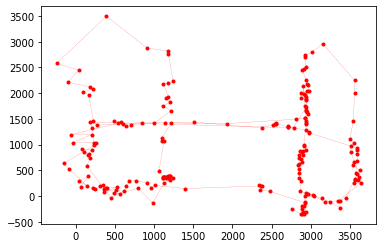

In [214]:
import matplotlib.pyplot as plt

plt.plot(df_clean["x"], df_clean["y"], color="red", marker='o', linestyle='dashed', linewidth=0.2, markersize=3)
#plt.plot(potato["x"], potato["y"], color="blue", marker='x', linestyle='dashed', linewidth=0.2, markersize=3)
plt.show

In [250]:
x_temp = df_clean['x'].tolist()
y_temp = df_clean['y'].tolist()

df_clean = pd.DataFrame({"x": x_temp,"y": y_temp})
df_clean

,x,y
0,2762,-257
1,2870,-344
2,2916,-344
3,2894,-254
4,2888,-188
...,...,...
206,2477,92
207,2932,-132
208,2935,-309
209,2896,-308


## Etsitään pisteiden välinen etäisyys

In [235]:
import math
p1 = [df_clean['x'][0], df_clean['y'][0]]
p2 = [df_clean['x'][1], df_clean['y'][1]]
distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )

print(distance)

138.68309197591464


In [253]:
z = 0
while z < len(df_clean)-1:
    #return [x for x in range(lst[0], lst[-1]+1) if x not in lst]
    p1 = [df_clean['x'][z], df_clean['y'][z]]
    p2 = [df_clean['x'][z+1], df_clean['y'][z+1]]
    distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
    z += 1
    print(distance)

138.68309197591464
46.0
92.64987857520376
66.27216610312357
25.059928172283335
90.09439494219383
116.06894502837527
110.76551810017412
179.44637081869334
162.78820596099706
451.8683436577517
89.00561780022652
73.55270219373317
43.266615305567875
22.02271554554524
78.87331614684399
133.37541002748594
132.90974381135493
87.8179936004006
34.92849839314596
196.9771560359221
117.00427342623003
71.02816342831905
92.64987857520376
359.4620981410975
542.2665396278845
241.0020746798666
820.9859925723459
219.59280498231266
104.44615837837216
34.0147027033899
189.85520798756087
44.94441010848846
36.87817782917155
202.76340892774513
80.30566605165541
27.80287754891569
101.40019723846694
25.317977802344327
88.50988645343524
87.02298546935747
79.40403012442127
267.1722290957651
90.80198235721508
6.708203932499369
114.27160627207444
889.1687128998635
793.161395934018
289.0276803352925
579.4290293038484
88.50988645343524
526.780789323225
85.75546629807339
152.95751043999115
57.42821606144492
292.19514

In [238]:
def find_missing(filler, lst): 
    #return [x for x in range(lst[0], lst[-1]+1) if x not in lst]
    z = 0
    while z < len(df_clean):
        if lst[0] < lst[-1]:
            #return [x for x in range(lst[0], lst[-1]+1) if x not in lst]
            p1 = [df_clean['x'][z], df_clean['y'][z]]
            p2 = [df_clean['x'][z+1], df_clean['y'][z+1]]
            distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
            z += 1
        else:
            #return [x for x in range(lst[0], lst[-1],-1) if x not in lst]
            #filler.append(temp)
            p1 = [df_clean['x'][z], df_clean['y'][z]]
            p2 = [df_clean['x'][z], df_clean['y'][z]]
            distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
            z += 1


x_temp = df_clean['x'].tolist()
y_temp = df_clean['y'].tolist()

x_filler = find_missing(x_temp)
y_filler = find_missing(y_temp)
print("x", x_filler)
print("y",y_filler) 

KeyError: 8

In [233]:
print("x", len(x_filler))
print("y",len(y_filler))
filler_df = pd.DataFrame({"x": x_filler,"y": y_filler})
filler_df 

x 110
y 86


ValueError: arrays must all be same length

In [210]:
x_temp = df_clean['x'].tolist()
y_temp = df_clean['y'].tolist()

x_filler = []
y_filler = []

x_first = []
x_second = []
for i, j in zip(x_temp, y_temp):
    '''
    x_first = 0
    x_second = 0
    y_first = 0
    y_second = 0
    x_first = x_temp.index(i)
    x_second = x_temp.index(i)+1
    '''
    x_first.append(x_temp[x_temp.index(i)])
    x_second.append(x_temp[x_temp.index(i)]+1)
    #print(x_first, x_second)
    #print(x_temp[x_first], x_temp[x_second])
    '''
    if x_temp[x_first] < x_temp[x_second]:
        for z in range(x_temp[x_first], x_temp[x_second]):
            x_filler.append(z)
    else:
        for z in range(x_temp[x_first], x_temp[x_second],-1):
            x_filler.append(z)
    
    if x_temp.index(i) != x_temp[len(x_temp)-1]:
        x_first = x_temp.index(i)
        x_second = x_temp.index(i)+1
        print(x_temp[x_first])
        for z in range(x_temp[x_first]-1, x_temp[x_second]-1, 10):
            x_filler.append(z)
    else:
        print("Final")
        
    if y_temp.index(j) != y_temp[len(y_temp)-1]:
        y_first = y_temp.index(j)
        y_second = y_temp.index(j)+1
        for g in range(x_temp[y_first]-1, y_temp[y_second]-1, 10):
            y_filler.append(g)
    else:
        print("Final")
    '''
    #print(x_temp[x_first])
x_filler
x_first

[2762,
 2870,
 2916,
 2894,
 2888,
 2910,
 2924,
 2928,
 3038,
 3187,
 3349,
 3642,
 3553,
 3604,
 3568,
 3567,
 3617,
 3627,
 3543,
 3587,
 3555,
 3511,
 3510,
 3551,
 3501,
 3543,
 3560,
 3559,
 3152,
 3013,
 2923,
 2922,
 2940,
 2916,
 2892,
 2940,
 2947,
 2964,
 2973,
 2948,
 2873,
 2875,
 2939,
 2964,
 2925,
 2928,
 2815,
 1930,
 1137,
 848,
 271,
 224,
 161,
 88,
 224,
 177,
 -100,
 34,
 -246,
 390,
 911,
 1182,
 1181,
 1242,
 1177,
 1118,
 1181,
 1151,
 1204,
 1118,
 1210,
 997,
 703,
 634,
 597,
 577,
 483,
 535,
 -65,
 200,
 -42,
 256,
 233,
 200,
 82,
 97,
 172,
 159,
 186,
 137,
 362,
 386,
 395,
 525,
 363,
 506,
 480,
 558,
 792,
 982,
 1122,
 1196,
 1237,
 1206,
 1116,
 1126,
 1192,
 1154,
 1124,
 1128,
 1178,
 1117,
 1179,
 1200,
 1163,
 1153,
 1171,
 1115,
 1062,
 1124,
 1100,
 1094,
 1217,
 1510,
 2376,
 2514,
 2546,
 2555,
 2555,
 2704,
 2703,
 2714,
 2942,
 2977,
 2971,
 3595,
 3587,
 3596,
 3575,
 3588,
 3452,
 3371,
 3374,
 3243,
 3139,
 2965,
 3024,
 2934,
 2867,


In [95]:
x_temp = df_clean['x'].tolist()
y_temp = df_clean['y'].tolist()

x_filler = []
y_filler = []
for i, j in zip(x_temp,y_temp):
    k = 10
    x_temp = []
    y_temp = []
    # Cut into 10 parts
    while k < 100:
        x_filler.append(round(i - k))
        y_filler.append(round(j - k))
        k+=10
    k = 10
    while k < 100:
        x_filler.append(round(i + k))
        y_filler.append(round(j + k))
        k+=10
    #x_filler.append(x_temp)
    #y_filler.append(y_temp)
    x_filler.append(i)
    y_filler.append(j)

print(len(x_filler))
print(len(y_filler))
x_filler[0:23]
#x_sorted = x_filler.sort
#x_sorted[0:10]

4009
4009


[2752,
 2742,
 2732,
 2722,
 2712,
 2702,
 2692,
 2682,
 2672,
 2772,
 2782,
 2792,
 2802,
 2812,
 2822,
 2832,
 2842,
 2852,
 2762,
 2860,
 2850,
 2840,
 2830]

In [96]:
filler_df = pd.DataFrame({"x": x_filler,"y": y_filler})
filler_df

,x,y
0,2752,-267
1,2742,-277
2,2732,-287
3,2722,-297
4,2712,-307
...,...,...
4004,2946,-287
4005,2956,-277
4006,2966,-267
4007,2976,-257


<function matplotlib.pyplot.show(close=None, block=None)>

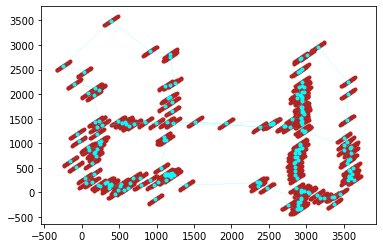

In [97]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.plot(filler_df['x'], filler_df['y'], color="firebrick", marker='o', linestyle='dashed', linewidth=0, markersize=3)
plt.plot(df_clean["x"], df_clean["y"], color="cyan", marker='o', linestyle='dashed', linewidth=0.2, markersize=3)
plt.show

In [81]:
print("Number of nodes: %s" % len(df["node_id"].unique()))

print("First node: %s" % df["node_id"].unique()[0])
node = df["node_id"].unique()[0]

df1 = df[df["node_id"] == node]
df1

Number of nodes: 32
First node: -2393099149039893833


,node_id,timestamp,x,y,z,q
0,-2393099149039893833,2020-06-24 12:20:08.533016+00:00,2762,-257,100,0
1,-2393099149039893833,2020-06-24 12:20:08.620015+00:00,2870,-344,100,0
2,-2393099149039893833,2020-06-24 12:20:09.622827+00:00,2916,-344,100,0
3,-2393099149039893833,2020-06-24 12:20:09.622846+00:00,2894,-254,100,0
4,-2393099149039893833,2020-06-24 12:20:10.116102+00:00,2888,-188,100,0
...,...,...,...,...,...,...
583869,-2393099149039893833,2020-10-23 06:57:02.988595+00:00,2766,-339,100,0
583870,-2393099149039893833,2020-10-23 06:57:21.988764+00:00,2772,-354,100,0
583871,-2393099149039893833,2020-10-23 06:57:31.988804+00:00,2776,-370,100,0
583872,-2393099149039893833,2020-10-23 06:57:41.988742+00:00,2775,-363,100,0
